<a href="https://colab.research.google.com/github/mathcc/machine_learning_projects/blob/master/image_recognition/mtcnn_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face Recognition using MTCNN**

In [3]:
!pip install mtcnn

**Importing required libraries** 

In [4]:
import cv2
from mtcnn.mtcnn import MTCNN

**Inicialize MTCNN**

In [5]:
detector = MTCNN()

**Load Global Variables**

In [19]:
# video path
video = "video/test_video.mp4"

# frames path
frames_dir = "faces/"

In [20]:
# create VideoCapture object and read from video file
cap = cv2.VideoCapture(video)

# frames per second
video_frames = 30

# frame id
id_frame = 0

ret = True
while ret:
    # capture frame by frame
    ret, frame = cap.read()

    if (id_frame % video_frames) == 0 and ret:
        
        result = detector.detect_faces(frame)
        # Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
        
        for i, item in enumerate(result):
            bounding_box = item['box']

            x = bounding_box[0]
            y = bounding_box[1]
            w = bounding_box[2]
            h = bounding_box[3]

            crop_bbox = frame[y:y+h, x:x+w]

            cv2.imwrite(frames_dir + str(id_frame) + "_" + str(i) + ".png", crop_bbox)

    id_frame += 1

In [31]:
from google.colab.patches import cv2_imshow
import numpy as np

faces/150_0.png


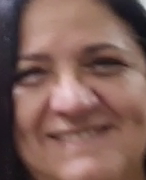

faces/150_1.png


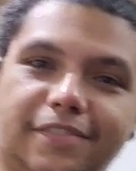

In [52]:
list_of_img_paths = ["faces/150_0.png","faces/150_1.png"]
for path in list_of_img_paths:
  print(path)
  cv2_imshow(cv2.imread(path))

**Detecção de face em imagens**

In [53]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle

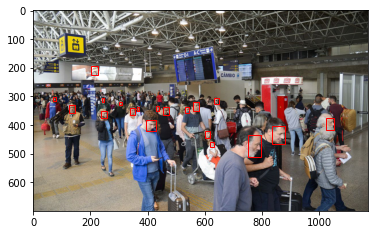

In [55]:
# draw an image with detected objects
def save_image(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box 
    for result in result_list:
        # get coordinates
        x, y, w, h = result['box']
        # create the shape
        rect = Rectangle((x, y), w, h, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)

    pyplot.savefig("iresult.png")

    img = cv2.imread(filename)

    crop_bbox = img[y:y+h, x:x+w]

    cv2.imwrite("crop1.png", crop_bbox)

# load image from file
filename = 'images/test1.jpg'
pixels = pyplot.imread(filename)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)

# display faces on the original image
save_image(filename, faces)

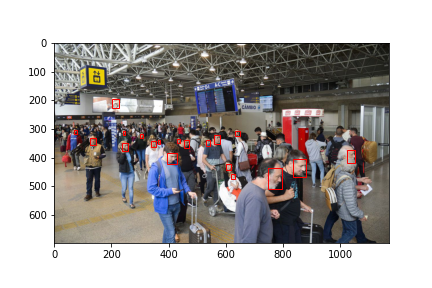

In [56]:
img = cv2.imread('iresult.png')
cv2_imshow(img)

**Using Webcam to Detect Live Faces**


Only works in local computer with webcam attached

---



In [ ]:
import cv2
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

video = cv2.VideoCapture(0)

if (video.isOpened() == False):
    print("Web Camera not detected")
while (True):
    ret, frame = video.read()
    if ret == True:
        location = detector.detect_faces(frame)
        if len(location) > 0:
            for face in location:
                x, y, width, height = face['box']
                x2, y2 = x + width, y + height
                cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 255), 4)
        cv2.imshow("Output",frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()

Web Camera not detected
